In [58]:
import pandas as pd
from datetime import datetime
import calendar

In [59]:
# data_path="data/"

In [60]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
submission= pd.read_csv("data/sampleSubmission.csv")

#### Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday (1)
workingday - whether the day is neither a weekend nor holiday (1)
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals --> target !!

In [61]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [63]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [65]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


In [66]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [67]:
train['datetime'][100].split()[1]

'09:00:00'

In [68]:
train['date']=train['datetime'].apply(lambda x:x.split()[0])
train['year']=train['datetime'].apply(lambda x:x.split()[0].split('-')[0])
train['month']=train['datetime'].apply(lambda x:x.split()[0].split('-')[1])
train['day']=train['datetime'].apply(lambda x:x.split()[0].split('-')[2])
train['hour']=train['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train['min']=train['datetime'].apply(lambda x:x.split()[1].split(':')[1])
train['sec']=train['datetime'].apply(lambda x:x.split()[1].split(':')[2])

In [69]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


In [70]:
datetime.strptime(train['date'][100],'%Y-%m-%d').weekday()
calendar.day_name[datetime.strptime(train['date'][100],'%Y-%m-%d').weekday()]

'Wednesday'

In [71]:
from datetime import datetime
import calendar

train['weekday'] = train['date'].apply(lambda x:
                                       calendar.day_name[datetime.strptime(x,'%Y-%m-%d').weekday()])

In [72]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,min,sec,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [73]:
train['season']=train['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
train['weather']=train['weather'].map({1:'Clear',2:'Coudy',3:'Light_Rain',4:'Heavy_Rain'})


In [74]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,min,sec,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [75]:
## 데이터시각화

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

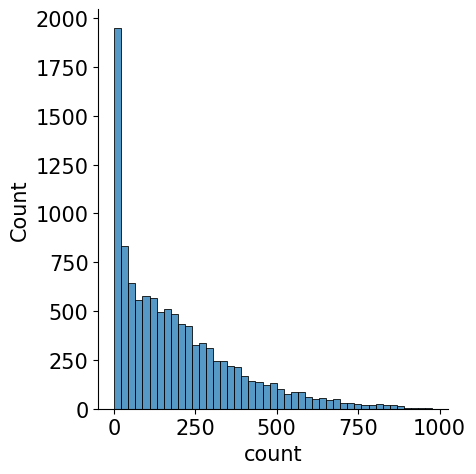

In [78]:
mpl.rc('font',size=15)
sns.displot(train['count'])

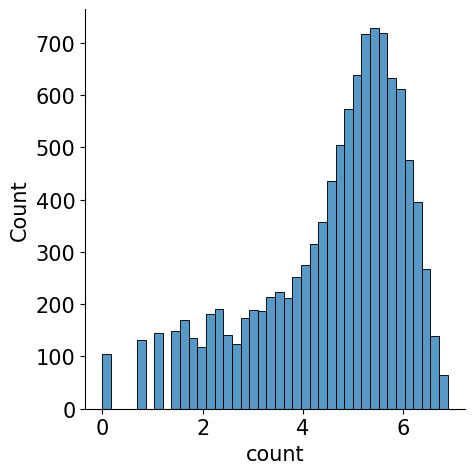

In [80]:
sns.displot(np.log(train['count']))

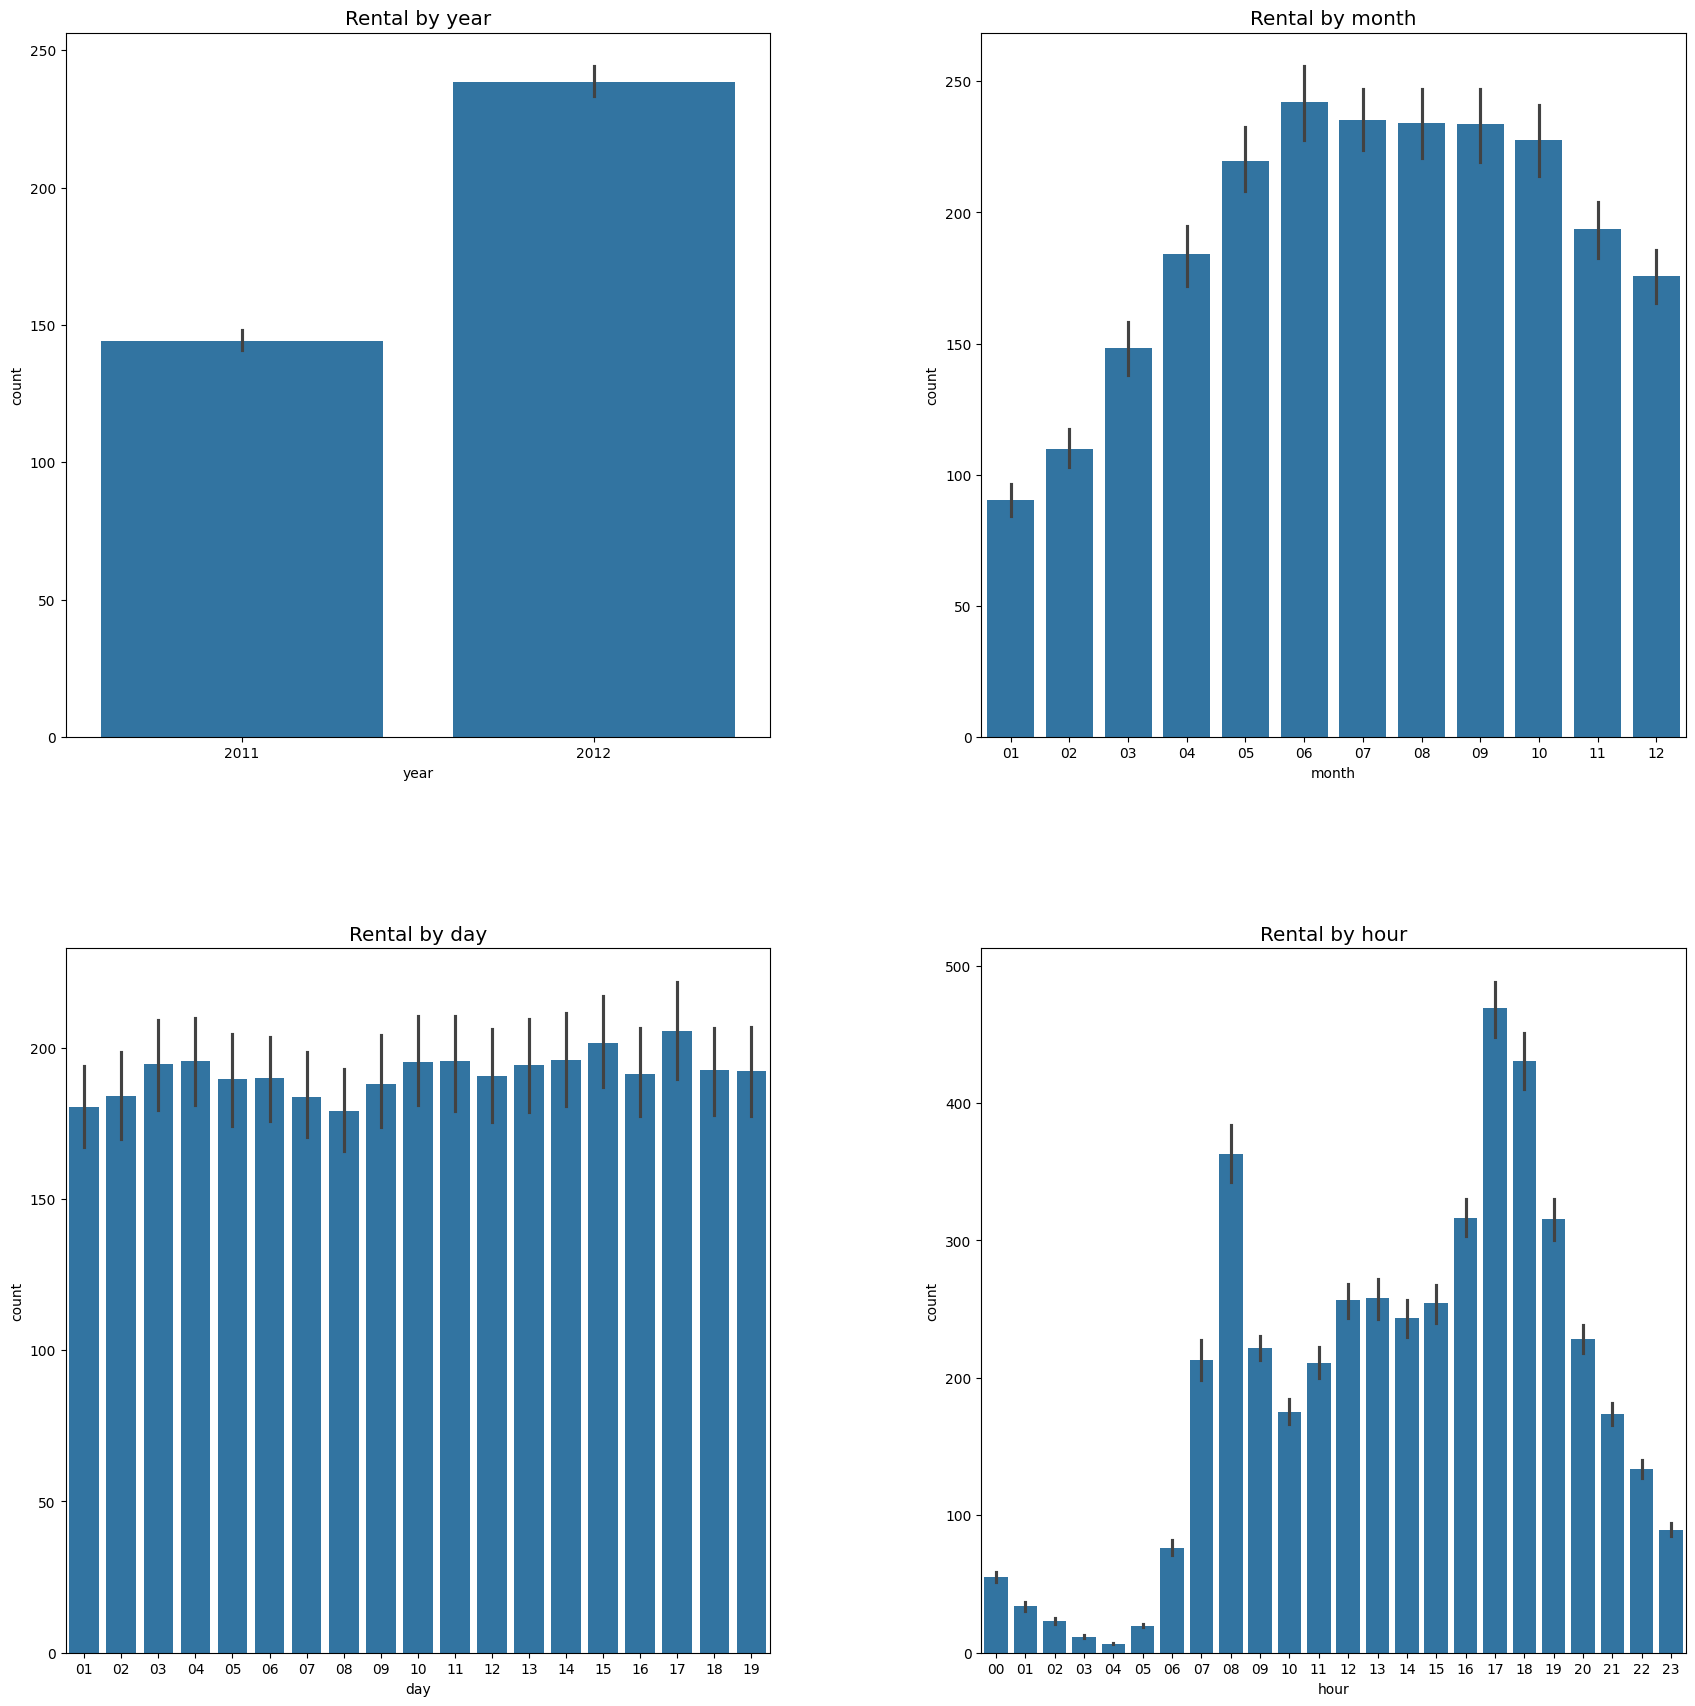

In [121]:
figure, axes = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18,18)

mpl.rc('font',size=12)

sns.barplot(x='year', y='count',data=train,ax=axes[0,0])
sns.barplot(x='month', y='count',data=train,ax=axes[0,1])
sns.barplot(x='day', y='count',data=train,ax=axes[1,0])
sns.barplot(x='hour', y='count',data=train,ax=axes[1,1])
# sns.barplot(x='min', y='count',data=train,ax=axes[2,0])
# sns.barplot(x='sec', y='count',data=train,ax=axes[2,1])

axes[0,0].set(title='Rental by year')
axes[0,1].set(title='Rental by month')
axes[1,0].set(title='Rental by day')
axes[1,1].set(title='Rental by hour')

figure.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)

plt.show()

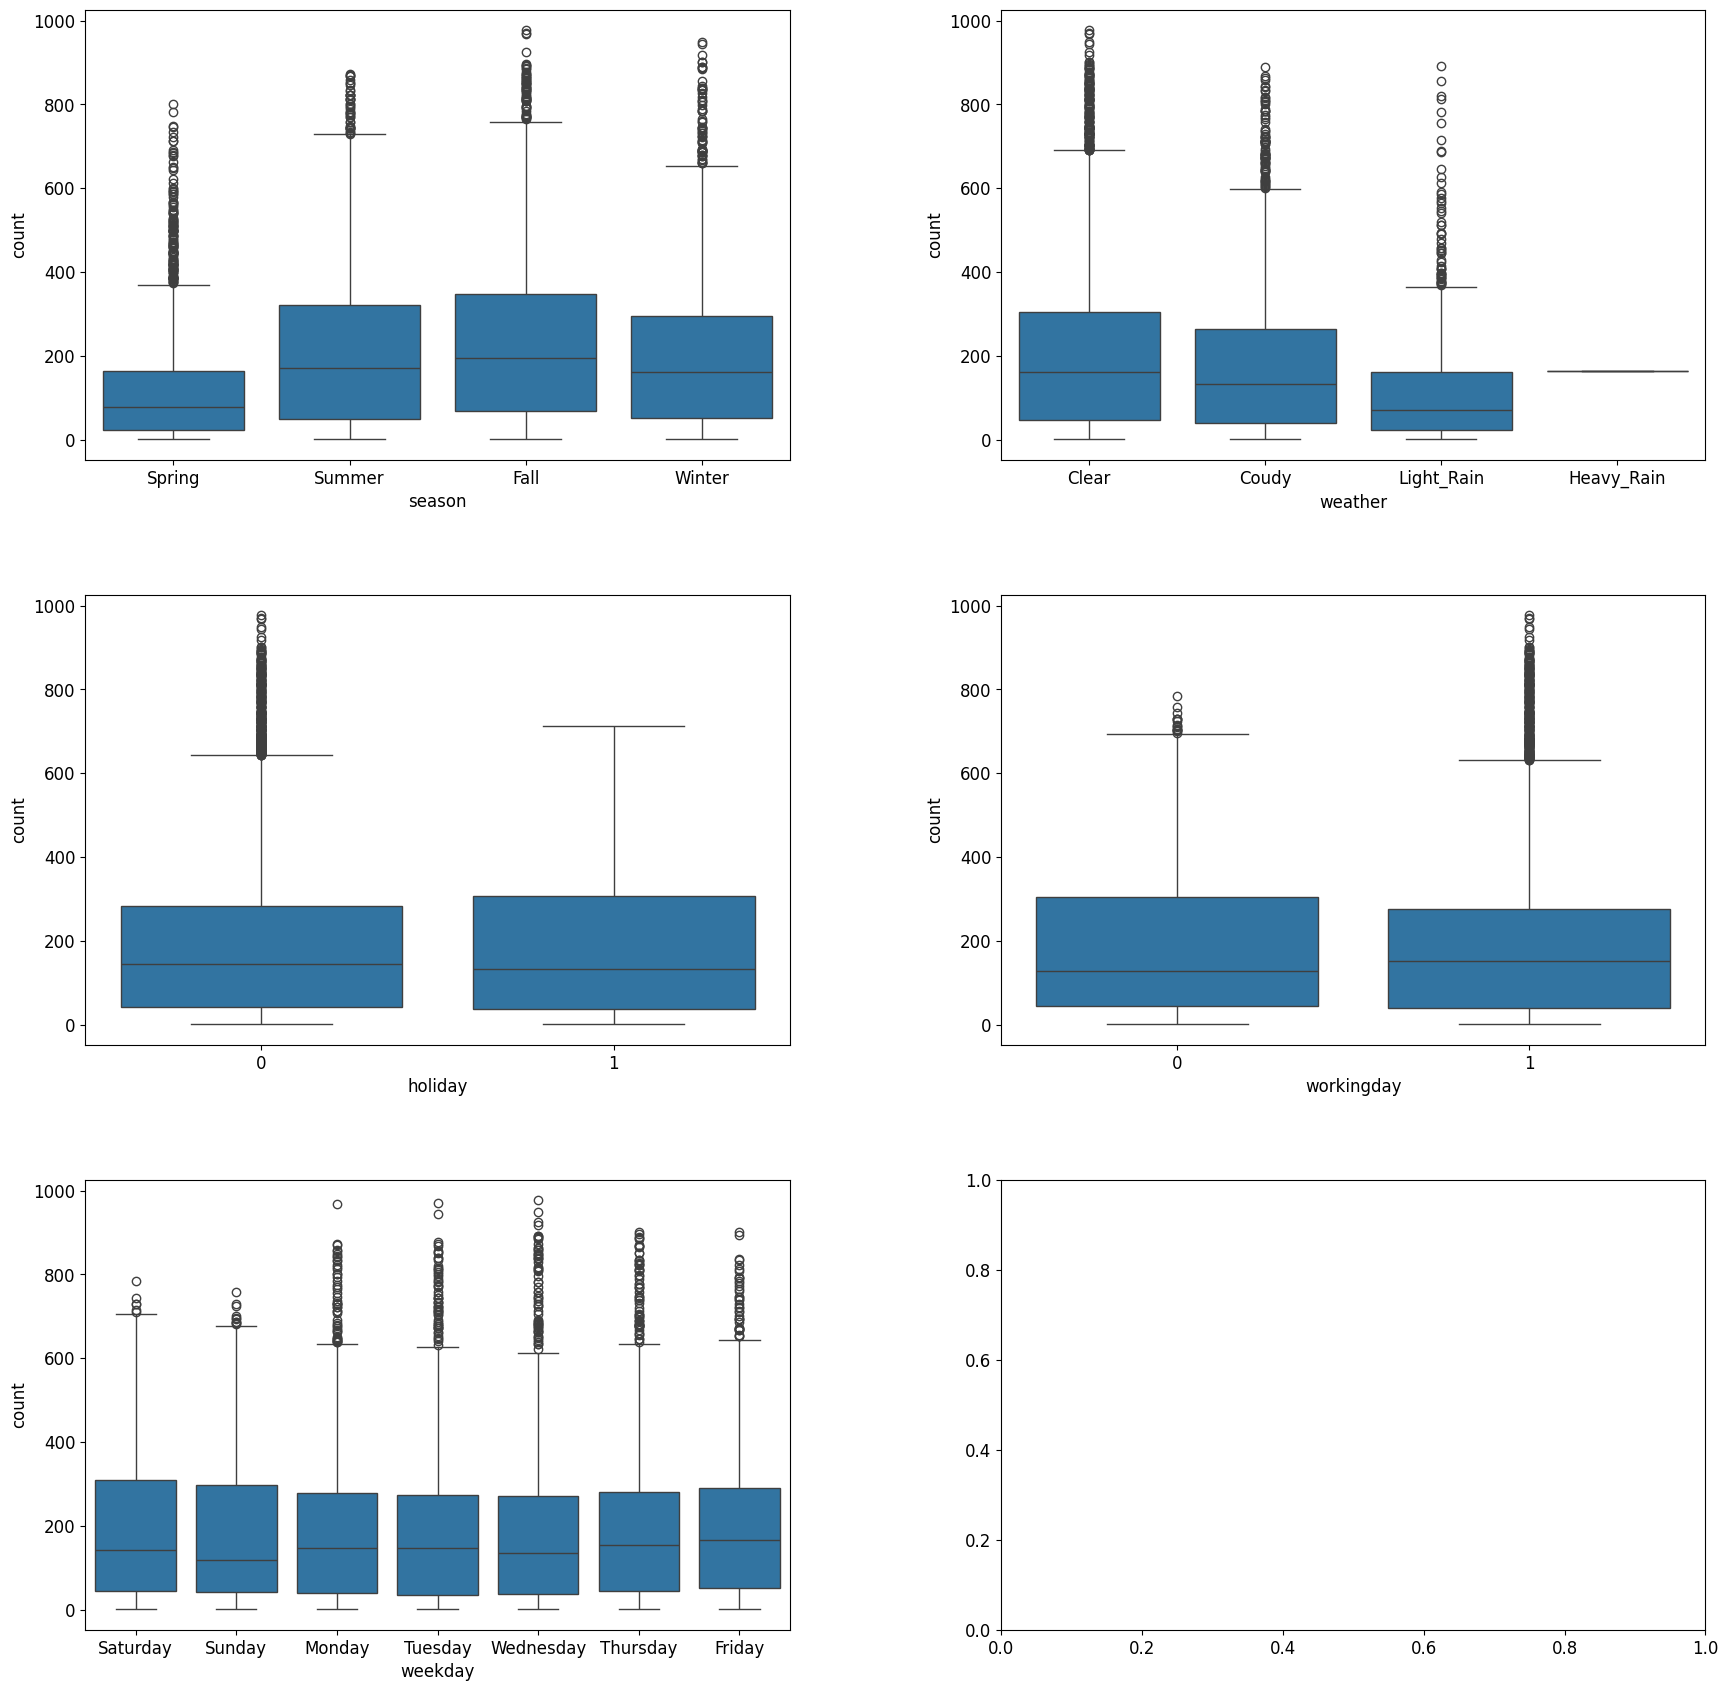

In [122]:
figure, axes = plt.subplots(nrows=3, ncols=2)

figure.set_size_inches(18,18)

mpl.rc('font',size=12)

sns.boxplot(x='season', y='count',data=train,ax=axes[0,0])
sns.boxplot(x='weather', y='count',data=train,ax=axes[0,1])
sns.boxplot(x='holiday', y='count',data=train,ax=axes[1,0])
sns.boxplot(x='workingday', y='count',data=train,ax=axes[1,1])
sns.boxplot(x='weekday', y='count',data=train,ax=axes[2,0])

figure.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)

plt.show()

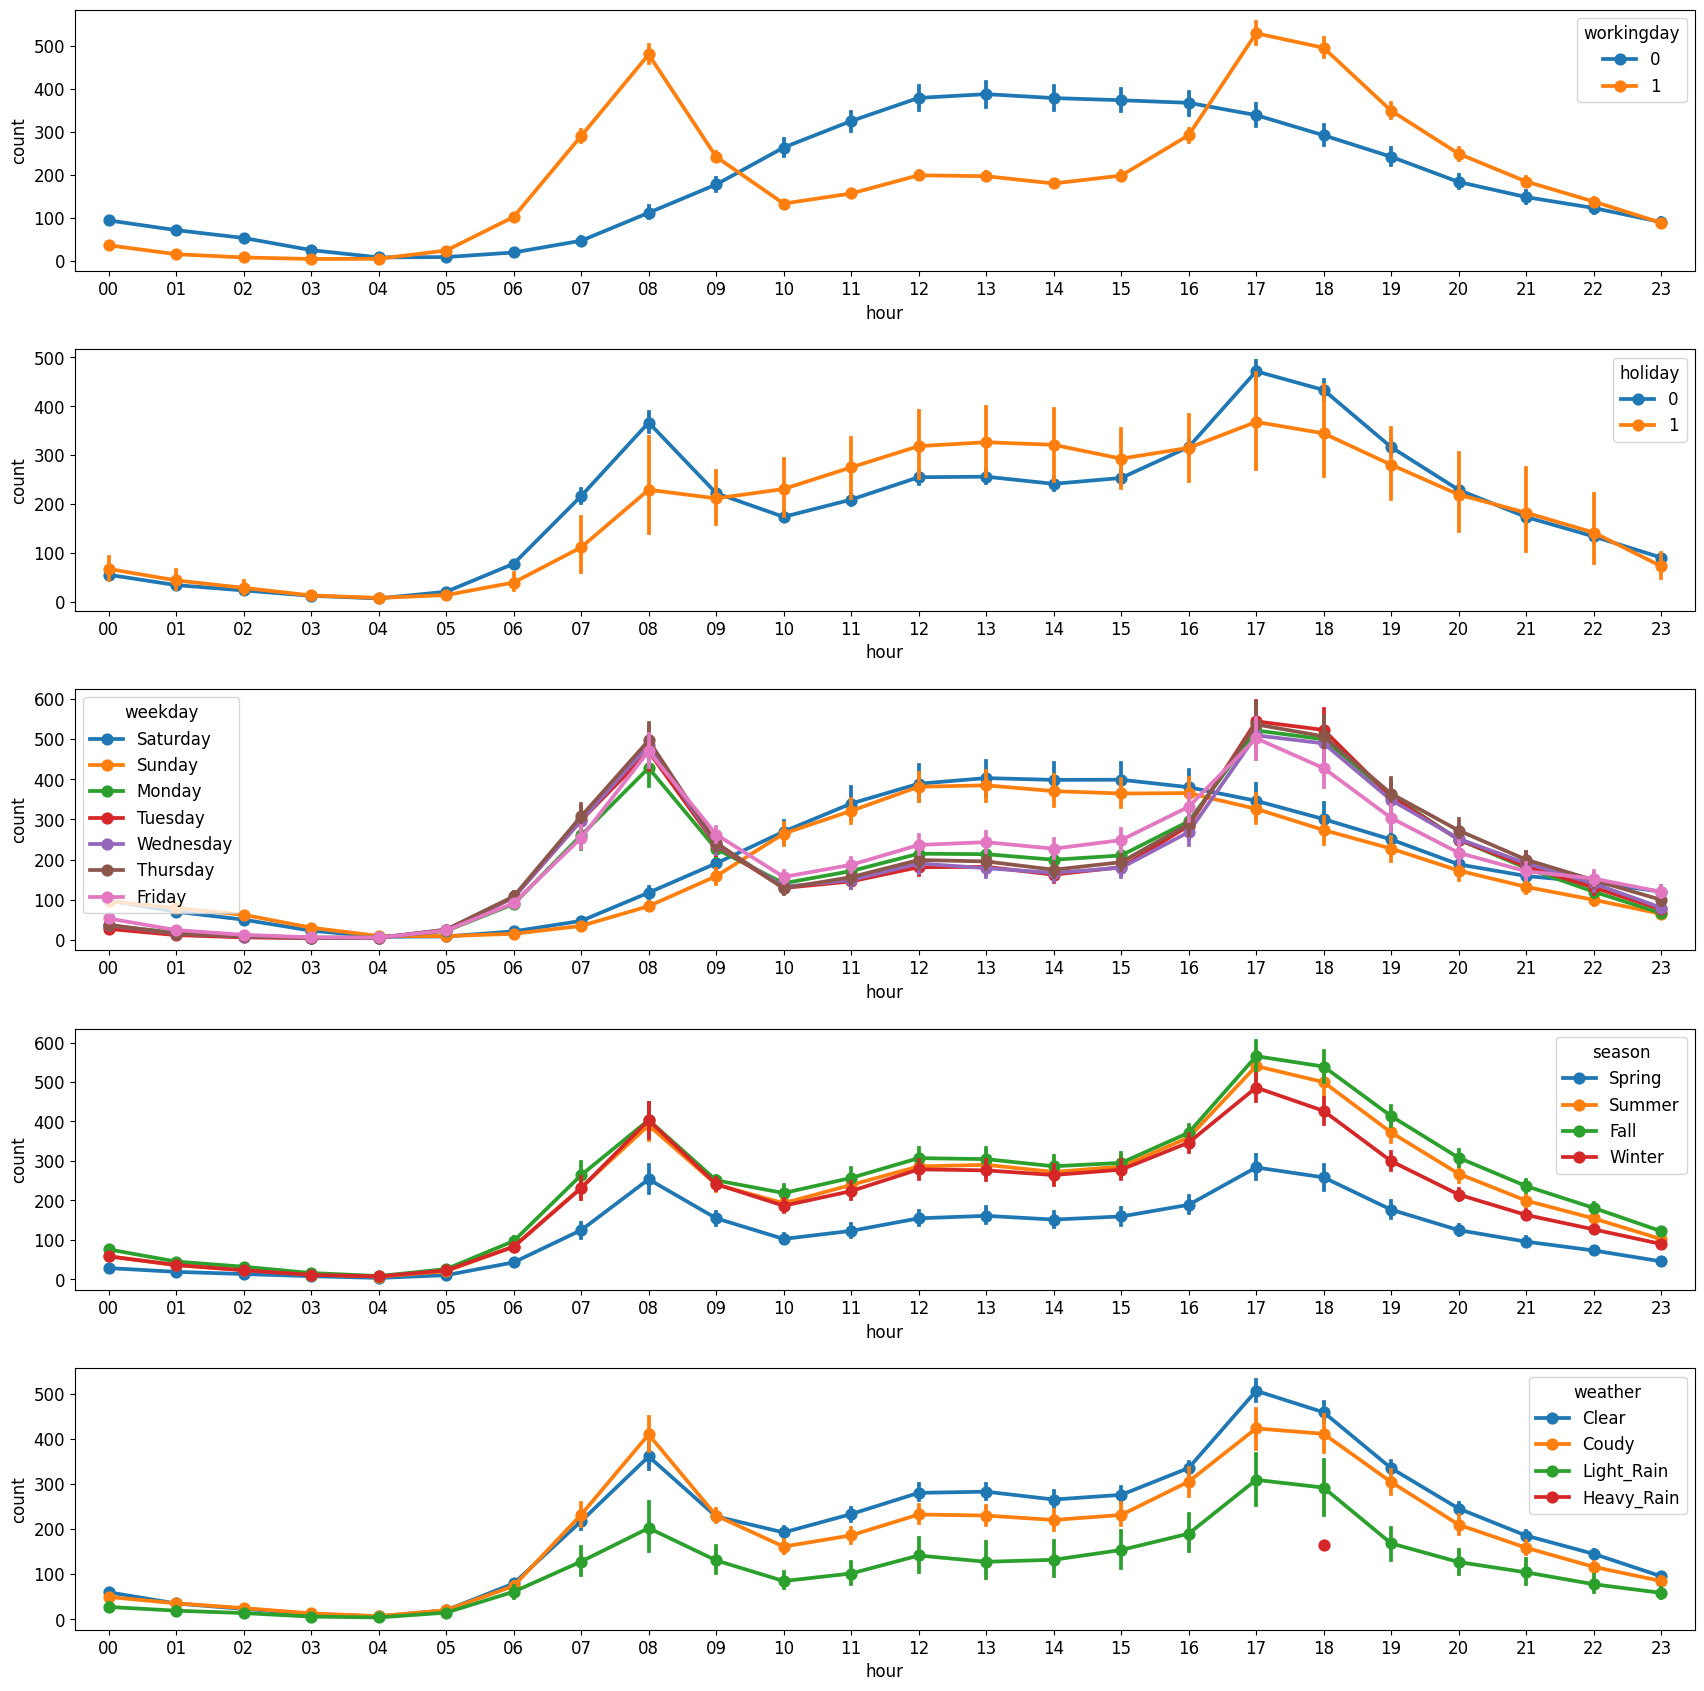

In [123]:
figure, axes = plt.subplots(nrows=5)

figure.set_size_inches(18,18)

mpl.rc('font',size=12)

sns.pointplot(x='hour',y='count',data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour',y='count',data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour',y='count',data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour',y='count',data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour',y='count',data=train, hue='weather', ax=axes[4])

figure.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)

plt.show()